# PL: Index SP500
# ENG: SP 500 index

S&P 500 – indeks giełdowy, w skład którego wchodzi 500 przedsiębiorstw o największej kapitalizacji, notowanych na New York Stock Exchange i NASDAQ. Są to głównie przedsiębiorstwa amerykańskie. Indeks ten jest najbardziej znanym wskaźnikiem zarządzanym przez Standard & Poor's oddział McGraw-Hill. https://pl.wikipedia.org/wiki/S%26P_500

The S&P 500, or simply the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The average annual total return of the index, including dividends, since inception in 1926 has been 9.8%; however, there were several years where the index declined over 30%. The index has posted annual increases 70% of the time.
https://en.wikipedia.org/wiki/S%26P_500_Index

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import quandl
import matplotlib.pyplot as plt
import math as math
import os 
import plotly.express as px
%matplotlib inline

In [2]:
#Opcje wyswietlania wyników biblioteki pandas
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [3]:
indicator="SP500"

#Wybranie aktualnej daty 
#Geting current date to the website
now = dt.datetime.now()
year = '{:02d}'.format(now.year)
month = '{:02d}'.format(now.month)
day = '{:02d}'.format(now.day)

#Wyswietlanie daty
#Display data
day_month_year = '{}{}{}'.format(year, month, day)

print(day_month_year)

#Dodanie aktualnej daty do adresu strony internetowej
#Adding date to website link
url1="https://stooq.com/q/d/l/?s=^spx&d1=20100101&d2="
url2="&i=d"
url3=url1+day_month_year+url2

#Wyswietlanie adresu strony
#Display website link
print(url3)



20200520
https://stooq.com/q/d/l/?s=^spx&d1=20100101&d2=20200520&i=d


In [4]:
#Załadowanie pliku csv do ramki danych
df=pd.read_table(url3,sep=',' ,engine='python')
df.head()

print(df.tail())


            Date     Open     High      Low    Close        Volume
2607  2020-05-13  2865.86  2874.14  2793.15  2820.00  3.538682e+09
2608  2020-05-14  2794.54  2852.80  2766.64  2852.50  3.342014e+09
2609  2020-05-15  2829.95  2865.01  2816.78  2863.70  3.291068e+09
2610  2020-05-18  2913.86  2968.09  2913.86  2953.91  3.637569e+09
2611  2020-05-19  2948.59  2964.21  2922.35  2922.94  2.852881e+09


In [5]:
#Zmienianie nazwy kolumn
#Rename columns
df = df.rename(columns={df.columns[0]: 'Date', df.columns[4]: 'USD'})
df = df[['Date', 'USD']].copy()
df.dropna(subset = ['USD'], inplace=True)

#Wybieranie cen akcji od daty 2010-01-01
#Select price from 2010-01-01
filter = (df['Date'] >= '2010-01-01')
df = df[filter]

df.tail(10)

Date      USD
2602  2020-05-06  2848.42
2603  2020-05-07  2881.19
2604  2020-05-08  2929.80
2605  2020-05-11  2930.32
2606  2020-05-12  2870.12
2607  2020-05-13  2820.00
2608  2020-05-14  2852.50
2609  2020-05-15  2863.70
2610  2020-05-18  2953.91
2611  2020-05-19  2922.94

In [6]:
#Wyswietlanie danych na wykresie przy pomocy biblioteki plotly.express
#Displaying data in graph with plotly.express
fig = px.line(df, x='Date', y='USD')

fig.update_layout(
    title_text= indicator +" - ceny akcji od 2010 do teraz, źrodło:\"stooq.com\"" +'<br>'+ indicator+" stocks price from 2010-current, source:\"stooq.com\"",title_x=0.5,
    xaxis_title="Data (Date)",
    yaxis_title="Cena (USD)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ))

fig.show()


# PL: Przewidywanie indexu SP500 przy użyciu Prophet
# ENG: Prediction SP500 Index with Prophet

In [7]:
#Konwertowanie kolumny data na typ daty
#Convert column type to date time
df["Date"] = pd.to_datetime(df["Date"])

#Ustawienie kolumny Date jako index
#Set date to index
df.index = df['Date']
df = df.drop(columns=['Date'])

df.tail()

USD
Date               
2020-05-13  2820.00
2020-05-14  2852.50
2020-05-15  2863.70
2020-05-18  2953.91
2020-05-19  2922.94

In [8]:
#Resetowanie indexu
#Reset index
df = df.reset_index()

#Zmiana nazwy kolumn dla biblioteki prophet
#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'USD': 'y'})

#Wyswietlanie ramki danych df
#Display Data Frame df
df.tail()

ds        y
2607 2020-05-13  2820.00
2608 2020-05-14  2852.50
2609 2020-05-15  2863.70
2610 2020-05-18  2953.91
2611 2020-05-19  2922.94

In [9]:
#Importowanie biblioteki Prophet
#Import Prophet library
from fbprophet import Prophet

#Inicjowanie nowego objektu Prophet
#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Wywołanie metody dopasowania obiektu i wprowadzenie jej w ramke danych df
#Call object's fit method and pass in the historical dataframe
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [10]:
#Dodanie przyszłych dat do kolumny "ds"
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2972 2021-05-15
2973 2021-05-16
2974 2021-05-17
2975 2021-05-18
2976 2021-05-19

In [11]:
#Przypisane przewidywanych danych
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2972 2021-05-15  3194.108558  3047.179940  3347.717031
2973 2021-05-16  3193.992462  3031.333272  3349.038997
2974 2021-05-17  3186.274015  3017.883467  3338.384589
2975 2021-05-18  3189.382762  3033.614163  3335.619324
2976 2021-05-19  3187.691570  3029.712345  3341.448044

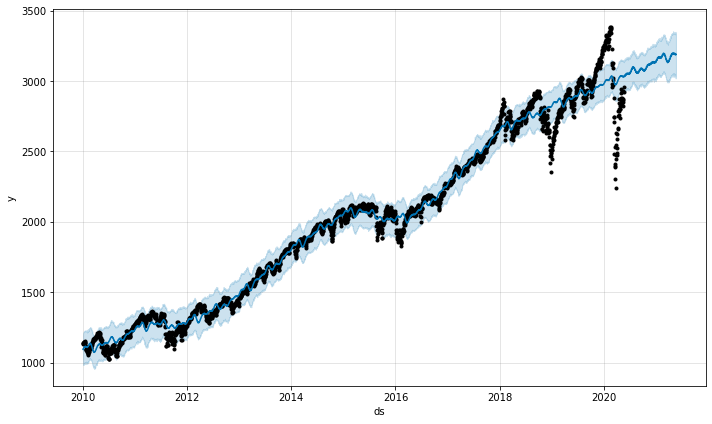

In [12]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig1 = m.plot(forecast)

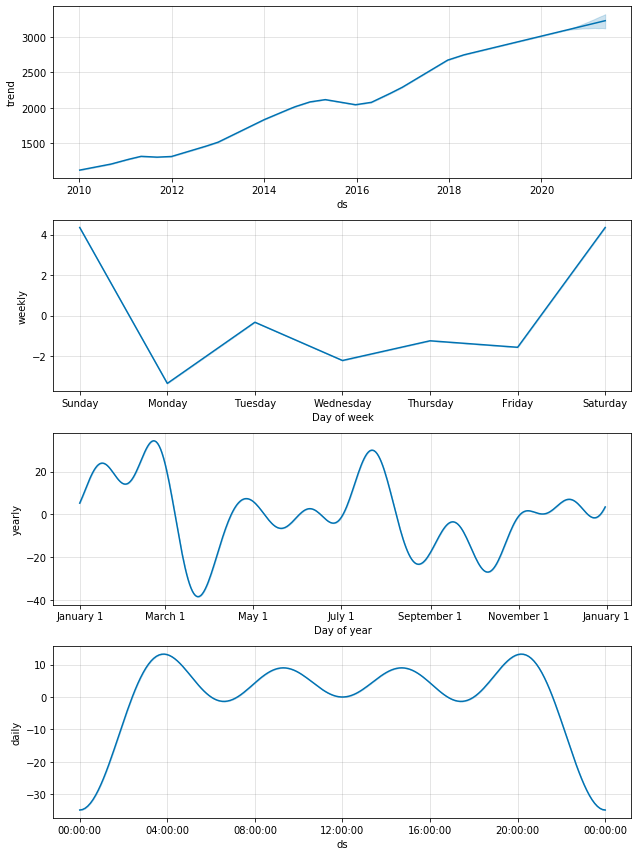

In [13]:
#Przedstawienie wykresów komponentów (trend)
#Show a plot with components
fig2 = m.plot_components(forecast)

In [14]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Dodanie lini trendu to wykresu
#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

#Wyswietlanie grafu z przewidywanymi wartosciami (Etykiety, tytuł itp)
#Show a plot with the forecast
fig.update_layout(
    title=(indicator +" przewidywane ceny akcji do 2021 - źrodło:\"stooq.com\"" +'<br>'+ indicator+ " price forecast 2021 using Prophet - source:\"stooq.com\""),
    xaxis_title="Data (Date)",
    yaxis_title="Cena (Price)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

In [15]:
#Złączanie dwóch ramek danych 
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Zmiana nazwy  kolumn
#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Wyswietlanie pierwszych pozycji w ramce danych
#Display header
df2.tail(15)

Date  Index     Forecast  Forecast_(lower)  Forecast_(upper)
2962 2021-05-05    NaN  3191.427699       3031.673356       3339.812934
2963 2021-05-06    NaN  3191.998752       3033.159760       3332.671214
2964 2021-05-07    NaN  3191.240411       3035.401673       3333.471653
2965 2021-05-08    NaN  3196.697700       3030.747323       3345.345719
2966 2021-05-09    NaN  3196.231900       3051.705246       3338.506405
2967 2021-05-10    NaN  3188.073827       3030.910939       3346.313814
2968 2021-05-11    NaN  3190.660086       3030.196097       3330.558319
2969 2021-05-12    NaN  3188.372397       3039.352579       3343.402707
2970 2021-05-13    NaN  3188.999114       3033.067701       3334.917440
2971 2021-05-14    NaN  3188.396725       3034.121739       3336.332847
2972 2021-05-15    NaN  3194.108558       3047.179940       3347.717031
2973 2021-05-16    NaN  3193.992462       3031.333272       3349.038997
2974 2021-05-17    NaN  3186.274015       3017.883467       3338.384589
2975 2021-05-18    NaN  3189.382762       3033.614163       3335.619324
2976 2021-05-19    NaN  3187.691570       3029.712345       3341.448044

In [16]:
#Obliczanie średniej dla kazdej kolumny
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Słownik dla wartosci średnich
#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})
#Wyswietlanie średnich wartości
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 1999.5424464012258,
 'Forecast': 2136.6381030462194,
 'Forecast_(Lower)': 2023.0963586911282,
 'Forecast_(Upper)': 2250.0819925431733}

In [17]:
#Maksymalne wartosci
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Słownik dla wartosci maksymalnych
#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Wyswietlanie maksymalnych wartości
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 3386.15,
 'Forecast': 3198.992833604986,
 'Forecast_(Lower)': 3069.58335410724,
 'Forecast_(Upper)': 3352.9112491268284}

In [18]:
#Minimalne wartosci
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Słownik z wartosciami minimalnymi
#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Wyswietlanie minimalnych wartości
#Display min
print('Min: ')
minDict

Min: 


{'Index': 1022.58,
 'Forecast': 1071.97013955633,
 'Forecast_(Lower)': 956.2319260096618,
 'Forecast_(Upper)': 1177.6474284198025}

In [19]:
#Wyswietlanie ile rekordow znajduje się powyzej lub ponizej przewidywanej wartosci akcji
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [20]:
#Wyswietlanie kiedy wystapila najmiejsza wartość
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa wartość
#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila najmiejsza przewidywana wartość
#Smallest predicted value date
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa przewidywana wartość
#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2021-05-01'

# ENG: Podsumowanie
# PL: SUMARRY

In [21]:
print('Średnia wartosc wynosi %f a średnia przewidywana wartosc wynosi %f .' % (meanIndex, meanForecast))
print('Wystąpiło %d rekordów (wartości) powyżej przewidywanej wartości.' % len(df2[indexAboveMeanForecast]))
print('Wystąpiło %d rekordów (wartości) poniżej przewidywanej wartości.' % len(df2[indexBelowMeanForecast]))
print('Najmiejsza wartość wynosi %f i miala miejsce %s .' % (minIndexValue, minIndexDate))
print('Największa wartośc wynosi %f i miała miejsce %s .' % (maxIndexValue, maxIndexDate))
print('Najmiejsza przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (minForecastValue, minForecastDate))
print('Największa przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (maxForecastValue, maxForecastDate))

Średnia wartosc wynosi 1999.542446 a średnia przewidywana wartosc wynosi 2136.638103 .
Wystąpiło 958 rekordów (wartości) powyżej przewidywanej wartości.
Wystąpiło 1654 rekordów (wartości) poniżej przewidywanej wartości.
Najmiejsza wartość wynosi 1022.580000 i miala miejsce 2010-07-02 .
Największa wartośc wynosi 3386.150000 i miała miejsce 2020-02-19 .
Najmiejsza przewidywana wartość wynosi 1071.970140 i będzie miala miejsce 2010-03-22 .
Największa przewidywana wartość wynosi 3198.992834 i będzie miala miejsce 2021-05-01 .


In [22]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 1999.542446 and the average predicted value is 2136.638103 .
There are 958 rows (values) above average predicted value.
There are 1654 rows (values) below average predicted value.
The smallest index value is 1022.580000 on 2010-07-02 .
The largest index value is 3386.150000 on 2020-02-19 .
The smallest predicted value is 1071.970140 on 2010-03-22 .
The largest predicted value is 3198.992834 on 2021-05-01 .


# PL: Zapisywanie ramki danych do bazy danych
# ENG: Saving DF with predictions to DB

In [23]:
#Sciezka pod ktorym folderem zapisywana jest baza danych SQLlite
#Destination folder
os.chdir("C:/Users/Dell Latitude/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

import sqlite3

In [24]:
#Nawiązanie połączenia z bazą danych SQLLite (predictions)
#Connecting with database
conn = sqlite3.connect('predictionsLS.db')
c = conn.cursor()

In [25]:
#Tworzenie tabeli w bazie
# Creating a table 
c.execute('CREATE TABLE IF NOT EXISTS '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [26]:
#Zapisywanie ramki danych do bazy danych
# Saving data frame to database
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [27]:
#Wyciąganie danych z bazy (w celu sprawdzenia poprawności kodu)
# Extracing records from database (just for a test)


c.execute("SELECT *  FROM "+indicator+"")
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 1132.99, 1093.1261499865006, 991.7762766666194, 1200.3864769640104)
('2010-01-05 00:00:00', 1136.52, 1098.1794109696361, 983.9280983380102, 1212.6567312928844)
('2010-01-06 00:00:00', 1137.14, 1098.3224792476963, 985.5906748582025, 1214.058111781136)
('2010-01-07 00:00:00', 1141.69, 1101.2979762804107, 982.9897814537114, 1215.1690697821105)
('2010-01-08 00:00:00', 1144.98, 1102.9178384168006, 984.9276578410513, 1220.2703986175036)
('2010-01-11 00:00:00', 1146.98, 1106.2970984300816, 993.3504926592208, 1215.930904323117)
('2010-01-12 00:00:00', 1136.22, 1110.7367187436707, 1000.1581097958255, 1221.0528626143766)
('2010-01-13 00:00:00', 1145.68, 1110.0807451460507, 991.4635989604615, 1219.3979364561144)
('2010-01-14 00:00:00', 1148.46, 1112.090089239904, 997.6722112872918, 1225.6029395873861)
('2010-01-15 00:00:00', 1136.03, 1112.5994069652986, 997.8184717290625, 1227.5727574281248)
('2010-01-19 00:00:00', 1150.23, 1115.1087331029678, 1003.1466563315084, 1222.5537

('2012-04-26 00:00:00', 1399.98, 1347.3578023670118, 1232.2173696626076, 1461.4573118583646)
('2012-04-27 00:00:00', 1403.36, 1347.5202135871964, 1235.9087306152596, 1462.5115253046379)
('2012-04-30 00:00:00', 1397.91, 1346.4754157488292, 1238.7607382195768, 1457.1719837700496)
('2012-05-01 00:00:00', 1405.82, 1349.5304275476674, 1229.8000251318695, 1454.0631348017291)
('2012-05-02 00:00:00', 1402.31, 1347.5822547078556, 1234.256184298454, 1456.3624918517628)
('2012-05-03 00:00:00', 1391.57, 1348.415305964785, 1230.9200362386305, 1464.0816009143975)
('2012-05-04 00:00:00', 1369.1, 1347.8838368118722, 1234.5034107840731, 1469.9883174269848)
('2012-05-07 00:00:00', 1369.58, 1345.1691034071237, 1234.361597154502, 1462.8517157742044)
('2012-05-08 00:00:00', 1363.72, 1347.825959896516, 1237.2195516129061, 1464.7684165020821)
('2012-05-09 00:00:00', 1354.58, 1345.568365464513, 1238.2410324227144, 1458.1150611779485)
('2012-05-10 00:00:00', 1357.99, 1346.1853466183677, 1230.4461073341317, 145

('2013-01-31 00:00:00', 1498.11, 1519.7295091830074, 1411.0173349899476, 1637.7574926304706)
('2013-02-01 00:00:00', 1513.17, 1520.0691558772105, 1409.2095845311171, 1629.1152424642141)
('2013-02-04 00:00:00', 1495.71, 1521.499024489562, 1407.411816530988, 1630.7934989571374)
('2013-02-05 00:00:00', 1511.29, 1526.0181114506877, 1413.0641515839152, 1634.9506810855928)
('2013-02-06 00:00:00', 1512.12, 1525.8321996243706, 1424.742075255465, 1638.066738296227)
('2013-02-07 00:00:00', 1509.39, 1528.7024697284846, 1415.2802253299271, 1651.019547012914)
('2013-02-08 00:00:00', 1517.93, 1530.4532776074025, 1412.4870457998961, 1640.469134403649)
('2013-02-11 00:00:00', 1517.01, 1535.6661268379578, 1424.669096036558, 1643.9555888427387)
('2013-02-12 00:00:00', 1519.43, 1541.1702882565999, 1422.2581067409662, 1646.069027275155)
('2013-02-13 00:00:00', 1520.33, 1541.774787935482, 1432.6645771064393, 1654.987434804541)
('2013-02-14 00:00:00', 1521.38, 1545.2122645286802, 1434.0521947179345, 1657.08

('2020-03-26 00:00:00', 2630.07, 2976.446894877506, 2869.2307059892623, 3085.7700087172816)
('2020-03-27 00:00:00', 2541.47, 2977.384990860828, 2866.524634462353, 3092.9970438554355)
('2020-03-30 00:00:00', 2626.65, 2980.82279280286, 2857.587304637982, 3094.300211531007)
('2020-03-31 00:00:00', 2584.59, 2985.9797271193047, 2864.7390714089433, 3098.9837214726467)
('2020-04-01 00:00:00', 2470.5, 2986.37714801371, 2881.55848638044, 3095.5097047799645)
('2020-04-02 00:00:00', 2526.9, 2989.761478081423, 2875.5715863035384, 3102.9394003125008)
('2020-04-03 00:00:00', 2488.65, 2991.9483800662897, 2879.6275124115177, 3099.479732028806)
('2020-04-06 00:00:00', 2663.68, 2998.0051997546657, 2893.0278484959535, 3110.1384967564954)
('2020-04-07 00:00:00', 2659.41, 3003.665372948141, 2891.413357405815, 3118.369410152284)
('2020-04-08 00:00:00', 2749.98, 3004.390428098951, 2888.2528810646522, 3121.3920026370993)
('2020-04-09 00:00:00', 2789.82, 3007.935403461801, 2900.1568872253397, 3121.149653929056

('2020-10-28 00:00:00', None, 3101.3198744353786, 2985.5964950996313, 3228.920799063676)
('2020-10-29 00:00:00', None, 3104.0373574247806, 2981.35205899263, 3217.1334652177966)
('2020-10-30 00:00:00', None, 3105.3305655618574, 2993.0543197814395, 3220.0525118830165)
('2020-10-31 00:00:00', None, 3112.72013756962, 2991.190551400738, 3237.9909389196564)
('2020-11-01 00:00:00', None, 3114.0461557631875, 3001.348777643287, 3233.7433139408454)
('2020-11-02 00:00:00', None, 3107.5217018980716, 2980.9247592356605, 3224.2254318098767)
('2020-11-03 00:00:00', None, 3111.5693196739594, 2986.9271431539514, 3223.5419150284742)
('2020-11-04 00:00:00', None, 3110.5604803241217, 2991.6239930879824, 3229.324014843748)
('2020-11-05 00:00:00', None, 3112.277160303738, 2986.3043798640138, 3229.241719051883)
('2020-11-06 00:00:00', None, 3112.573335678086, 2987.729418408293, 3228.144064676503)
('2020-11-07 00:00:00', None, 3118.9935945003936, 2998.5907851911397, 3235.9930472406886)
('2020-11-08 00:00:00',